In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings=pd.read_csv('data/preprocessed_user_item_rating.csv' )
ratings.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1,user_001000,Radiohead,4.9
2,2,user_001000,Animal Collective,4.7
3,3,user_001000,Girl Talk,4.6
4,4,user_001000,Aesop Rock,4.2


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167494 entries, 0 to 167493
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   167494 non-null  int64  
 1   userid       167494 non-null  object 
 2   artist-name  167494 non-null  object 
 3   rating       167494 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ MB


In [3]:
# Number of users
print('The ratings dataset has', ratings['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 992 unique users
The ratings dataset has 36947 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [4]:
agg_ratings = ratings.groupby('artist-name').agg(mean_rating = ('rating','mean'),
                                  number_of_ratings = ('rating','count')).reset_index().sort_values('number_of_ratings',  ascending=False)
agg_ratings.head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


In [5]:
agg_ratings = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 24975 to 15699
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist-name        2712 non-null   object 
 1   mean_rating        2712 non-null   float64
 2   number_of_ratings  2712 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 84.8+ KB


In [6]:
agg_ratings.sort_values(by = 'number_of_ratings', ascending=False).head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


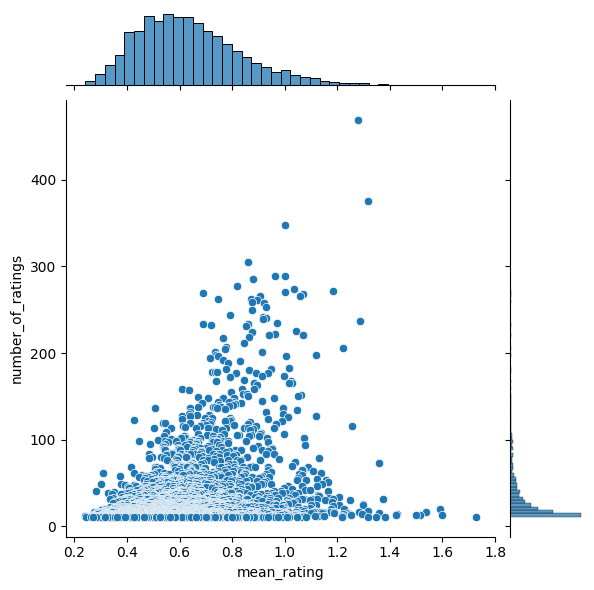

In [68]:
sns.jointplot(x='mean_rating',y='number_of_ratings', data = agg_ratings)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101827 entries, 0 to 101826
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   101827 non-null  int64  
 1   userid       101827 non-null  object 
 2   artist-name  101827 non-null  object 
 3   rating       101827 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [8]:
ratings_final.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1793,user_000997,Wilco,0.2
2,15405,user_000974,Wilco,0.2
3,18996,user_000970,Wilco,0.7
4,22509,user_000965,Wilco,2.2


In [70]:
# Number of users
print('The ratings dataset has', ratings_final['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings_final['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings_final['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings_final['rating'].unique()))

The ratings dataset has 991 unique users
The ratings dataset has 2712 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [13]:
ratings_final.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1793,user_000997,Wilco,0.2
2,15405,user_000974,Wilco,0.2
3,18996,user_000970,Wilco,0.7
4,22509,user_000965,Wilco,2.2


## Create user-item matrix

In [9]:
matrix = ratings_final.pivot_table(index='artist-name', columns='userid', values='rating')
matrix[543:].head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
artist-name,,,,,,,,,,,,,,,,,,,,,
Counting Crows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Covenant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cowboy Junkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cradle Of Filth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Craig Armstrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## KNN

In [55]:
df = matrix.fillna(0)
df1=df.copy()
matrix_knn = matrix.fillna(0)

In [26]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(matrix_knn.values)
distances, indices = knn.kneighbors(matrix_knn.values, n_neighbors=3)

In [42]:
indices

array([[   0, 2548,  982],
       [   1, 2598,   70],
       [   2, 1284, 2417],
       ...,
       [2709, 2569, 2706],
       [2710, 2707, 1210],
       [2711, 2704, 1257]])

In [47]:

x=indices[0].tolist()
x.remove(982)
x

[0, 2548]

In [28]:
distances

array([[0.00000000e+00, 3.32957904e-01, 3.77666740e-01],
       [0.00000000e+00, 2.45710692e-01, 3.27127765e-01],
       [0.00000000e+00, 4.27414516e-01, 4.31746122e-01],
       ...,
       [0.00000000e+00, 5.82182752e-01, 5.85959467e-01],
       [0.00000000e+00, 6.06531631e-01, 6.45544485e-01],
       [1.11022302e-16, 5.52082122e-01, 5.73160762e-01]])

In [33]:
# get the index for 'Cradle Of Filth'
index_for_movie = matrix_knn.index.tolist().index('Cradle Of Filth')
# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
# distances between 'Cradle Of Filth' and the similar movies
movie_distances = distances[index_for_movie].tolist()
# the position of 'Cradle Of Filth' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'Cradle Of Filth' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'Cradle Of Filth' from the list movie_distances
movie_distances.pop(id_movie)
print('The Nearest Movies to Cradle Of Filth:', sim_movies)
print('The Distance from Cradle Of Filth:', movie_distances)


The Nearest Movies to Cradle Of Filth: [1326, 992]
The Distance from Cradle Of Filth: [0.2762588935361907, 0.3685519629711752]


In [48]:
def recommend_movies(user, num_recommended_movies):

  print('The list of the Movies {} Has Watched \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_movies = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_movies.append((m, predicted_rating))

  sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Movies \n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommended_movies]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1

In [49]:
# store the original dataset in 'df', and create the copy of df, df1 = df.copy().
def movie_recommender(user, num_neighbors, num_recommendation):

  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_movies = indices[m].tolist()
      movie_distances = distances[m].tolist()
    
      if m in sim_movies:
        id_movie = sim_movies.index(m)
        sim_movies.remove(m)
        movie_distances.pop(id_movie) 

      else:
        sim_movies = sim_movies[:n_neighbors-1]
        movie_distances = movie_distances[:n_neighbors-1]
           
      movie_similarity = [1-x for x in movie_distances]
      movie_similarity_copy = movie_similarity.copy()
      nominator = 0

      for s in range(0, len(movie_similarity)):
        if df.iloc[sim_movies[s], user_index] == 0:
          if len(movie_similarity_copy) == (number_neighbors - 1):
            movie_similarity_copy.pop(s)
          
          else:
            movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
            
        else:
          nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
          
      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_r = nominator/sum(movie_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_movies(user, num_recommendation)

In [56]:
movie_recommender('user_001000', 3, 4)

The list of the Movies user_001000 Has Watched 

A Tribe Called Quest
Aesop Rock
Andrew Bird
Animal Collective
Aphex Twin
Arcade Fire
Architecture In Helsinki
Asobi Seksu
Beck
Beirut
Belle And Sebastian
Ben Folds
Ben Folds Five
Billy Bragg & Wilco
Bloc Party
Bon Iver
Boys Noize
Broken Social Scene
Cat Power
Chris Garneau
Clap Your Hands Say Yeah
Cold War Kids
Common
Crystal Castles
Cut Chemist
Cut Copy
Damien Jurado
Death Cab For Cutie
Death From Above 1979
Deerhoof
Devendra Banhart
Digitalism
Dj Cam
Dj Shadow
Dj Vadim
Dntel
Does It Offend You, Yeah?
El-P
Elliott Smith
Explosions In The Sky
Feist
Final Fantasy
Fleet Foxes
Flying Lotus
Franz Ferdinand
Frog Eyes
Girl Talk
Great Lake Swimmers
Grizzly Bear
Guru
Iron & Wine
Iron & Wine And Calexico
Islands
Jack Johnson
Jaga Jazzist
Jamie Lidell
John Coltrane
John Legend
Justice
Kaki King
Kanye West
Klaxons
Koop
Low
Lupe Fiasco
M. Ward
M.I.A.
Madeleine Peyroux
Man Man
Massive Attack
Mates Of State
Matt Pond Pa
Medeski Martin And Wood
Mgmt
Mo

In [53]:
del df

## normalize ratingsmatrixmatrix.mean(axis=1)

In [200]:
df = pd.DataFrame([matrix.mean(axis=1)]).T

# iterating the columns
for col in df.columns:
    print(col)

0


In [206]:
df.index

Index(['!!!', '*Nsync', '+44', '...And You Will Know Us By The Trail Of Dead',
       '10,000 Maniacs', '10Cc', '12 Stones', '1200 Micrograms',
       '16 Horsepower', '2 Many Dj'S',
       ...
       'Пётр Ильич Чайковский', 'Сергей Васильевич Рахманинов', '久石譲', '坂本龍一',
       '宇多田ヒカル', '川井憲次', '植松伸夫', '浜崎あゆみ', '菅野よう子', '近藤浩治'],
      dtype='object', name='artist-name', length=2712)

In [215]:
average_per_artist = matrix.mean(axis=1).to_frame()
average_per_artist['artist-name']=list(average_per_artist.index)
average_per_artist[average_per_artist['artist-name']=='10Cc']

,0,artist-name
artist-name,,
10Cc,0.494737,10Cc


In [10]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm[543:].head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
artist-name,,,,,,,,,,,,,,,,,,,,,
Counting Crows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Covenant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cowboy Junkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cradle Of Filth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Craig Armstrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
matrix_norm.max()

userid
user_000001    4.373077
user_000002    4.283898
user_000003    4.084298
user_000004    3.722601
user_000005    3.966423
                 ...   
user_000996    3.722601
user_000997   -0.408571
user_000998    3.722601
user_000999    3.713502
user_001000    3.882677
Length: 991, dtype: float64

## Pearson similarity

In [269]:
# after normalizations the ratings is mean-centered cosine similarity
item_similarity_pearson = matrix_norm.T.corr()
item_similarity_pearson.head()

artist-name,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
artist-name,,,,,,,,,,,,,,,,,,,,,
!!!,1.000000,NaN,1.0,0.018882,-0.898513,NaN,NaN,NaN,NaN,0.047672,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
*Nsync,NaN,1.000000,NaN,NaN,-0.107624,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+44,1.000000,NaN,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And You Will Know Us By The Trail Of Dead,0.018882,NaN,1.0,1.000000,0.371154,NaN,NaN,-0.628619,-0.556459,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693375,NaN
"10,000 Maniacs",-0.898513,-0.107624,NaN,0.371154,1.000000,1.0,NaN,NaN,-1.000000,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.000000,NaN


## Cosine similarity

In [98]:
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine

array([[ 1.        ,  0.        ,  0.03227107, ...,  0.        ,
         0.00370767,  0.        ],
       [ 0.        ,  1.        ,  0.02903801, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03227107,  0.02903801,  1.        , ...,  0.00332662,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.00332662, ...,  1.        ,
        -0.11107803,  0.        ],
       [ 0.00370767,  0.        ,  0.        , ..., -0.11107803,
         1.        ,  0.01898293],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.01898293,  1.        ]])

In [99]:
columns = list(item_similarity_pearson.columns)
item_similarity_cosine = pd.DataFrame(item_similarity_cosine, columns = columns, index=columns)
item_similarity_cosine.head()

,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
!!!,1.000000,0.000000,0.032271,0.019312,-0.029416,0.020459,0.000000,0.000000,0.025004,-0.009494,...,0.125007,0.0,0.0,0.005733,0.002387,0.0,0.0,0.000000,0.003708,0.0
*Nsync,0.000000,1.000000,0.029038,0.000000,-0.015372,0.008099,0.006839,0.014334,0.000000,-0.101641,...,0.017378,0.0,0.0,0.003759,0.000000,0.0,0.0,0.000000,0.000000,0.0
+44,0.032271,0.029038,1.000000,-0.004984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079984,0.0,0.0,0.000000,0.000000,0.0,0.0,0.003327,0.000000,0.0
...And You Will Know Us By The Trail Of Dead,0.019312,0.000000,-0.004984,1.000000,0.016325,0.015111,0.019856,-0.031599,-0.011404,-0.006266,...,0.000000,0.0,0.0,0.010204,0.000000,0.0,0.0,0.028228,0.021622,0.0
"10,000 Maniacs",-0.029416,-0.015372,0.000000,0.016325,1.000000,-0.012582,0.000000,0.000000,0.044599,0.000000,...,0.000000,0.0,0.0,-0.057482,0.009552,0.0,0.0,0.000000,0.004370,0.0


## Jaccard

In [113]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = pairwise_distances(matrix_norm.fillna(0), metric = "hamming") # 1 - hamming = jaccard disimilarity
# optionally convert it to a DataFrame
jac_sim = pd.DataFrame(jac_sim, index=columns, columns=columns)

In [111]:
jac_sim.head()

,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
!!!,0.000000,0.075681,0.072654,0.112008,0.070636,0.077699,0.070636,0.071645,0.080727,0.073663,...,0.074672,0.075681,0.076690,0.083754,0.075681,0.072654,0.077699,0.075681,0.085772,0.070636
*Nsync,0.075681,0.000000,0.030272,0.084763,0.027245,0.033300,0.026236,0.027245,0.040363,0.036327,...,0.031282,0.032291,0.033300,0.041372,0.033300,0.029263,0.034309,0.032291,0.043391,0.027245
+44,0.072654,0.030272,0.000000,0.081736,0.029263,0.034309,0.026236,0.027245,0.039354,0.036327,...,0.030272,0.031282,0.032291,0.041372,0.032291,0.028254,0.033300,0.030272,0.042381,0.026236
...And You Will Know Us By The Trail Of Dead,0.112008,0.084763,0.081736,0.000000,0.079717,0.086781,0.078708,0.077699,0.089808,0.087790,...,0.084763,0.084763,0.085772,0.092836,0.085772,0.081736,0.086781,0.082745,0.092836,0.079717
"10,000 Maniacs",0.070636,0.027245,0.029263,0.079717,0.000000,0.031282,0.025227,0.026236,0.036327,0.035318,...,0.030272,0.030272,0.031282,0.038345,0.030272,0.027245,0.032291,0.030272,0.039354,0.025227


# Predictions

## Predict user rating for 1 artist

In [252]:
user_id = 'user_001000'#user_000965'

picked_artist = '10Cc'

user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs.head(20)

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
5,Iron & Wine,3.203226
6,Aesop Rock,3.187234
7,M. Ward,2.996429
8,Sufjan Stevens,2.682323
9,Death Cab For Cutie,2.315441


In [325]:
picked_movie_similarity_score

artist-name,artist-name,similarity_score
0,!!!,NaN
1,*Nsync,NaN
2,+44,NaN
3,...And You Will Know Us By The Trail Of Dead,NaN
4,"10,000 Maniacs",1.0
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,NaN


In [337]:
picked_movie_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={'10Cc':'similarity_score'})

n=5

user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_movie_similarity_score, on='artist-name', \
                                   how='inner').sort_values(['rating'],ascending=False)[:20].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,0.997871
1,Animal Collective,3.709836,-0.231869
2,Radiohead,3.622601,0.176078
3,Girl Talk,3.535385,0.994850
4,Andrew Bird,3.261616,1.000000
5,Iron & Wine,3.203226,0.915419
8,Sufjan Stevens,2.682323,0.931299
9,Death Cab For Cutie,2.315441,-0.074791
10,M.I.A.,2.034109,0.349957
11,Common,1.791837,-0.616001


In [254]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

print(predicted_rating)

2.313766


In [ ]:
user_not_listened_artist = pd.DataFrame(matrix_norm['user_000009'].isna()).reset_index()
user_not_listened_artist
user_not_listened_artist = user_not_listened_artist[user_not_listened_artist['user_000009']==True]['artist-name'].values.tolist()
user_not_listened_artist

In [155]:
pd.DataFrame(matrix_norm['user_000009'].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()

,artist-name,user_000009
0,:Wumpscut:,-1.008333
1,Pink Floyd,-0.858647
2,Skinny Puppy,-0.803125
3,Anberlin,-0.796667
4,宇多田ヒカル,-0.770588
5,Tiësto,-0.740351
6,My Chemical Romance,-0.705660
7,Assemblage 23,-0.675000
8,Paramore,-0.674286
9,Depeche Mode,-0.671269


## Recomend artist list

In [330]:
def artist_recomendation_item_item(userid='user_000009',number_of_similar_items=5, number_of_recommendations=3):
    import operator
    from math import isnan
    #songs that the user has not listened to.
    user_not_listened_artist = pd.DataFrame(matrix_norm[userid].isna()).reset_index()
    user_not_listened_artist = user_not_listened_artist[user_not_listened_artist[userid]==True]['artist-name'].values.tolist()
    
    
    #songs that the user has listened to.
    picked_userid_listened = pd.DataFrame(matrix_norm[userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()\
                            .rename(columns={userid:'rating'})
    
    rating_prediction = {}
    
    for artist in user_not_listened_artist:
        # Calculate the similarity score of the user song compared to not listened songs
        artist_similarity_score = item_similarity_pearson[[artist]].reset_index().rename(columns={artist:'similarity_score'})
        # Rank the similarities between the user listened songs and the not listened songs.
        picked_userid_listened_similarity = pd.merge(left=picked_userid_listened, 
                                                right=artist_similarity_score, 
                                                on='artist-name', 
                                                how='inner')\
                                        .sort_values(['rating','similarity_score'], ascending=False)[:number_of_similar_items]#.fillna(0)#.dropna()
       
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from the user 
        predicted_rating = round(np.average(picked_userid_listened_similarity['rating'], 
                                        weights=picked_userid_listened_similarity['similarity_score']), 6)#/sum(picked_userid_listened_similarity['similarity_score'])
       # predicted_rating = ((picked_userid_listened_similarity['rating']\
        #                    *picked_userid_listened_similarity['similarity_score']).sum())/picked_userid_listened_similarity['similarity_score'].sum()#/sum(picked_userid_listened_similarity['similarity_score'])
        
    # Save the predicted rating in the dictionary
        
        
        rating_prediction[artist] = predicted_rating
        if isnan(rating_prediction[artist]):
            rating_prediction.popitem()
        #if rating_prediction[artist]>2:
         #   print(artist)
        
    # Return the top recommended artist
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations
recommended_artist = artist_recomendation_item_item(userid='user_001000', number_of_similar_items=5, number_of_recommendations =10)
recommended_artist

[('Sparks', 227.585151),
 ('Rogue Wave', 107.088712),
 ('Missy Elliott', 53.054045),
 ('Danger Mouse', 32.707285),
 ('The Verve', 31.177204),
 ('Madlib', 29.333436),
 ('Sex Pistols', 17.206047),
 ('Primus', 11.969084),
 ('Au Revoir Simone', 11.805977),
 ('Bon Jovi', 11.718944)]

In [341]:
recommended_artist[0][1]

227.585151

# persist pearson_similarity_matrix matrix

In [342]:
matrix_norm.to_csv('./data/item_similarity_pearson.csv')
item_similarity_pearson.to_csv('./data/item_matrix_norm.csv')